<a href="https://colab.research.google.com/github/vgallegod/Senales-y-sistemas/blob/main/Taller_3_de_la_transformada_de_la_place.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1 Cuaderno definicion de la transformada de La Place
- Obtenga $ X(s) $ junto con su ROC de la anterior gráfica de polos y ceros.

### Solución del ejercicio

####  Interpretación de la gráfica de polos y ceros

- **Polos**: Hay dos polos en $ s = \pm j1 $, que corresponden a las raíces del denominador de la función.
- **Ceros**: Hay un cero en $ s = 0 $ de segundo orden (indicado por el "2" entre paréntesis), lo que significa que el numerador de la función tiene un término de grado 2 en $ s $.
- **Ganancia**  $K = 2 $: Esta es una constante multiplicativa que afecta la amplitud de la función $ X(s) $.

#### Escribir la función $ X(s) $

La forma general de una función racional en la transformada de Laplace es:

$
X(s) = K \frac{\text{(ceros en términos de } s\text{)}}{\text{(polos en términos de } s\text{)}}
$

Basándonos en la gráfica:

- Cero de segundo orden en $s = 0 $ implica un término $ s^2 $ en el numerador.
- Los polos están en $s = j1 $ y $ s = -j1 $, lo que corresponde a un denominador $ (s - j1)(s + j1) $, o $ s^2 + 1 $ en forma factorizada.

Por lo tanto, la expresión para $ X(s) $ es:

$
X(s) = K \frac{s^2}{s^2 + 1}
$

Con $ K = 2 $:

$
X(s) = 2 \frac{s^2}{s^2 + 1}
$

####  Determinar la Región de Convergencia (ROC)

La Región de Convergencia (ROC) para una función racional como esta depende de los polos. En este caso, los polos están en $ s = \pm j1 $.

Para este tipo de sistemas:

- Si la función representa una respuesta causal, la ROC sería $ \Re(s) > 0 $.
- Si es una respuesta anticausal, la ROC sería $ \Re(s) < 0 $.

Como no se nos proporciona más información, se asume que el sistema es causal, por lo que la ROC sería $ \Re(s) > 0 $.

#### Resultado final:

$
X(s) = 2 \frac{s^2}{s^2 + 1}
$

$
\text{ROC}: \Re(s) > 0
$


# 1.2 Cuaderno propiedades basicas de la transformada de La Place
Determinar los polos y ceros de

 $L{ E(t)*sin(Wot)}
 L{ E(t)*sin(Wot)} = Wo/s^2 + Wo^2$

In [ ]:
%matplotlib inline
import sympy as sym
import numpy as np


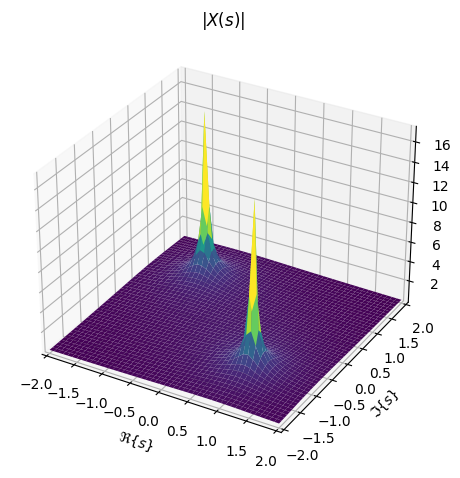

In [ ]:
#Graficar la transformada de laplace
s, Wo = sym.symbols(' s Wo', complex = True)
sigma, omega = sym.symbols( 'sigma omega')
X = Wo /(s**2 + Wo**2)
X1 = X.subs({s: sigma+sym.I*omega, Wo: 1+sym.I})
sym.plotting.plot3d(abs(X1), (sigma, -2, 2), (omega, -2, 2), xlabel=r'$\Re\{s\}$', ylabel=r'$\Im\{s\}$', title=r'$|X(s)|$');


In [ ]:
polos = sym.roots(sym.denom(X),s)
polos

{-I*Wo: 1, I*Wo: 1}

In [ ]:
ceros = sym.roots(sym.numer(X),s)
ceros

{}

In [ ]:
import matplotlib.pyplot as plt

def pole_zero_plot(poles, zeros, ax=None):

    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)

    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)

    plt.axis([-2, 2, -2, 2])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()

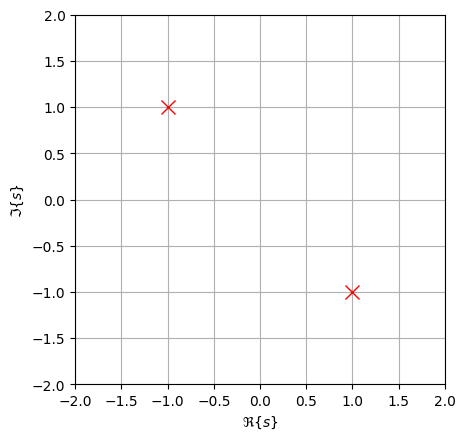

In [ ]:
X2 = X.subs(Wo, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), s), sym.roots(sym.numer(X2), s))

## 1.3 Demostrar las siguientes propiedades (sin utilizar tablas de propiedades)

1. **$ \mathcal{L} \{ x(t - t_0) \} = e^{-s t_0} X(s) $**

   **Demostración:**

   Aplicamos la definición de la transformada de Laplace:

   $
   \mathcal{L} \{ x(t - t_0) \} = \int_0^{\infty} x(t - t_0) e^{-st} dt
   $

   Realizando el cambio de variable $ t' = t - t_0 $, obtenemos:

   $
   \mathcal{L} \{ x(t - t_0) \} = e^{-s t_0} \int_0^{\infty} x(t') e^{-s t'} dt' = e^{-s t_0} X(s)
   $


2. **$ \mathcal{L} \{ x(at) \} = \frac{1}{|a|} X\left(\frac{s}{a}\right) $**

   **Demostración:**

   Definimos la transformada de Laplace de $ x(at) $:

   $
   \mathcal{L} \{ x(at) \} = \int_0^{\infty} x(at) e^{-st} dt
   $

   Hacemos el cambio de variable $ u = at $, por lo que $ du = a dt $:

   $
   \mathcal{L} \{ x(at) \} = \frac{1}{|a|} \int_0^{\infty} x(u) e^{-s \frac{u}{a}} du = \frac{1}{|a|} X\left(\frac{s}{a}\right)
   $


3. **$ \mathcal{L} \left\{ \frac{dx(t)}{dt} \right\} = s X(s) $**

   **Demostración:**

   Utilizando la definición de la transformada de Laplace y la integración por partes:

   $
   \mathcal{L} \left\{ \frac{dx(t)}{dt} \right\} = \int_0^{\infty} \frac{dx(t)}{dt} e^{-st} dt
   $

   Aplicando integración por partes:

   $
   \mathcal{L} \left\{ \frac{dx(t)}{dt} \right\} = \left[ x(t) e^{-st} \right]_0^{\infty} + s \int_0^{\infty} x(t) e^{-st} dt = s X(s)
   $


4. **$ \mathcal{L} \{ x(t) * y(t) \} = X(s) Y(s) $**

   **Demostración:**

   Definimos la convolución de $ x(t) * y(t) $:

   $
   (x * y)(t) = \int_0^t x(\tau) y(t - \tau) d\tau
   $

   Aplicamos la transformada de Laplace:

   $
   \mathcal{L} \{ x(t) * y(t) \} = \int_0^{\infty} \left( \int_0^t x(\tau) y(t - \tau) d\tau \right) e^{-st} dt
   $

   Aplicando el teorema de convolución, obtenemos:

   $
   \mathcal{L} \{ x(t) * y(t) \} = X(s) Y(s)
   $


## 1.4 Transformada de Laplace, polos, ceros y ROC

1. **Señal $ e^{-2t}u(t) + e^{-3t}u(t) $**

   La transformada de Laplace de cada término es:

   $
   \mathcal{L} \{ e^{-2t}u(t) \} = \frac{1}{s + 2}, \quad \mathcal{L} \{ e^{-3t}u(t) \} = \frac{1}{s + 3}
   $

   La transformada de Laplace total es:

   $
   X(s) = \frac{1}{s + 2} + \frac{1}{s + 3}
   $

   **Polos**: $ s = -2, s = -3 $

   **Ceros**: No hay ceros.

   **ROC**: $ \Re(s) > -2 $

2. **Señal $ e^{2t}u(t) + e^{-3t}u(-t) $**

   La transformada de Laplace de los términos es:

   $
   \mathcal{L} \{ e^{2t}u(t) \} = \frac{1}{s - 2}, \quad \mathcal{L} \{ e^{-3t}u(-t) \} = \frac{-1}{s + 3}
   $

   La transformada de Laplace total es:

   $
   X(s) = \frac{1}{s - 2} - \frac{1}{s + 3}
   $

   **Polos**: $ s = 2, s = -3 $

   **Ceros**: No hay ceros.

   **ROC**: $ -3 < \Re(s) < 2 $

3. **Señal $ e^{-3t}u(-|t|) $**

   Para esta señal simétrica, la transformada de Laplace se obtiene usando la propiedad de la función exponencial con el escalón unitario:

   $
   X(s) = \frac{-2}{s + 3}
   $

   **Polos**: $ s = -3 $

   **Ceros**: No hay ceros.

   **ROC**: $ \Re(s) < -3 $

4. **Señal $ e^{-2t} [u(t) - u(t - 5)] $**

   Esta es una señal truncada entre $ t = 0 $ y $ t = 5 $. La transformada de Laplace es:

   $
   X(s) = \frac{1 - e^{-5(s + 2)}}{s + 2}
   $

   **Polos**: $ s = -2 $

   **Ceros**: Dependen del factor exponencial.

   **ROC**: $ \Re(s) > -2 $


# 1.5 Cuaderno transformada inversa de La Place
- Obtener la transformada inversa de Laplace de
 manualmente.

Obtener la transformada inversa de Laplace de
$$  X(s)= \left\{ \frac{1}{(s+1)(s+2)^2} \right\} $$


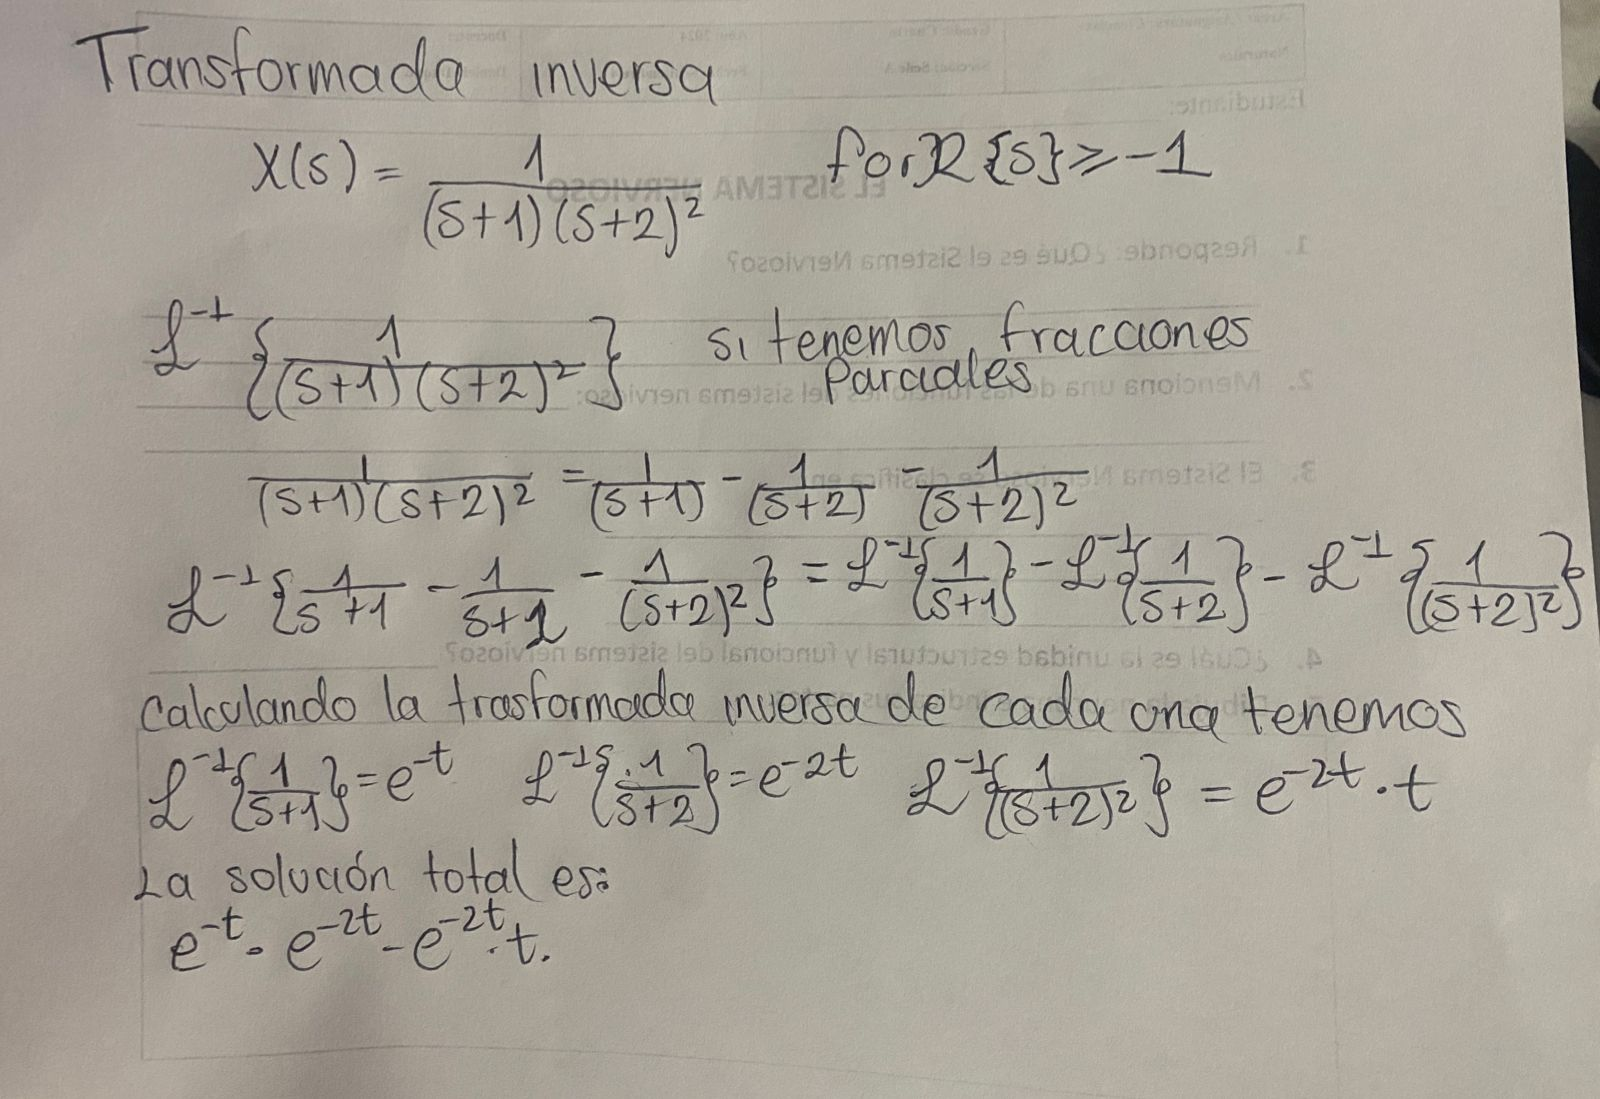

In [1]:
import sympy as sym
%matplotlib inline

In [2]:
s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

X = (1/((s+1)*(s+2)**2))
X

1/((s + 1)*(s + 2)**2)

In [3]:
polos = sym.roots(sym.denom(X))
polos

{-1: 1, -2: 2}

In [4]:
x1 = sym.inverse_laplace_transform(X, s, t)
x1

-t*exp(-2*t)*Heaviside(t) + exp(-t)*Heaviside(t) - exp(-2*t)*Heaviside(t)

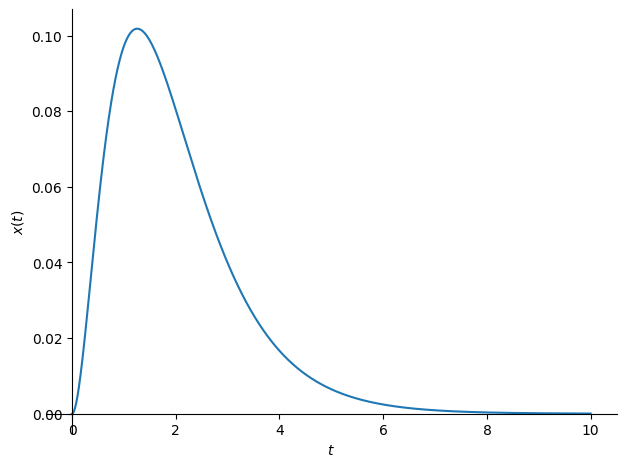

In [5]:
sym.plot(x1, (t, 0, 10), xlabel = '$t$', ylabel = '$x(t)$');

# 1.6 Cuaderno Autofunciones

# 1. Relación entre $\lambda$ y la salida obtenida al resolver la EDO

Dado que la entrada del sistema es $x(t) = e^{st}$, podemos interpretar que el parámetro $\lambda = s$. El término $s$ en la entrada representa la frecuencia compleja de la señal, y por lo tanto, está directamente relacionado con la respuesta del sistema.

Al resolver la ecuación diferencial ordinaria:

$$ a_0 y(t) + a_1 \frac{d y(t)}{dt} + a_2 \frac{d^2 y(t)}{dt^2} = e^{st} $$

La solución general, en el dominio de Laplace, es:

$$ Y(s) = \frac{X(s)}{a_0 + a_1 s + a_2 s^2} $$

Donde $X(s)$ es la transformada de la entrada $x(t)$, es decir, $X(s) = \frac{1}{s - \lambda}$.

Por lo tanto, la salida en el dominio de Laplace es:

$$ Y(s) = \frac{1}{(s - \lambda)(a_0 + a_1 s + a_2 s^2)} $$

Al aplicar la transformada inversa de Laplace, obtenemos la respuesta temporal del sistema, la cual depende de $\lambda$, que está relacionado con la frecuencia de la señal de entrada.

# 2. Generalización a una EDO de orden arbitrario

El mismo procedimiento se puede generalizar para una EDO de orden arbitrario:

$$ a_0 y(t) + a_1 \frac{d y(t)}{dt} + a_2 \frac{d^2 y(t)}{dt^2} + \cdots + a_n \frac{d^n y(t)}{dt^n} = e^{st} $$

La solución general para este tipo de ecuaciones será:

$$ Y(s) = \frac{1}{(s - \lambda)(a_0 + a_1 s + a_2 s^2 + \cdots + a_n s^n)} $$

Donde la relación entre $\lambda$ y la salida del sistema sigue estando dada por la frecuencia compleja $s$ de la entrada exponencial $e^{st}$.

Este método es aplicable para EDOs de cualquier orden, siempre que se resuelva en el dominio de Laplace.
